In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Updated Cw data')

In [ ]:
data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,T1,N1,IIA,Poorly differentiated,3,Regional,4,1,1,24,1,60,Alive
1,50,1,T2,N2,IIIA,Moderately differentiated,2,Regional,35,1,1,14,5,62,Alive
2,58,1,T3,N3,IIIC,Moderately differentiated,2,Regional,63,1,1,14,7,75,Alive
3,58,1,T1,N1,IIA,Poorly differentiated,3,Regional,18,1,1,2,1,84,Alive
4,47,1,T2,N1,IIB,Poorly differentiated,3,Regional,41,1,1,3,1,50,Alive
5,51,1,T1,N1,IIA,Moderately differentiated,2,Regional,20,1,1,18,2,89,Alive
6,51,1,T1,N1,IIA,Well differentiated,1,Regional,8,1,1,11,1,54,Alive
7,40,1,T2,N1,IIB,Moderately differentiated,2,Regional,30,1,1,9,1,14,Dead
8,68,1,T1,N1,IIA,Moderately differentiated,2,Regional,13,1,1,9,1,64,Dead
9,46,1,T3,N1,IIIA,Poorly differentiated,3,Regional,59,0,0,11,3,92,Alive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3204 non-null   int64 
 1   Sex                     3204 non-null   int64 
 2   T_Stage                 3204 non-null   object
 3   N_Stage                 3204 non-null   object
 4   6th_Stage               3204 non-null   object
 5   Differentiated          3204 non-null   object
 6   Grade                   3204 non-null   int64 
 7   A_Stage                 3204 non-null   object
 8   Tumor_Size              3204 non-null   int64 
 9   Estrogen_Status         3204 non-null   int64 
 10  Progesterone_Status     3204 non-null   int64 
 11  Regional_Node_Examined  3204 non-null   int64 
 12  Reginol_Node_Positive   3204 non-null   int64 
 13  Survival_Months         3204 non-null   int64 
 14  Mortality_Status        3204 non-null   object
dtypes: i

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [ ]:
feature_cols_mortality = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage',
                          'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                          'Estrogen_Status', 'Progesterone_Status',
                          'Regional_Node_Examined', 'Reginol_Node_Positive']

X = data[feature_cols_mortality]
y = data['Mortality_Status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
# Encode 'Differentiated' and 'Grade' as well
for col in ['Differentiated', 'Grade']:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le


In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train=logreg.predict(X_train)



In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})

Comparison_df

,Actual,Predicted
610,Alive,Alive
3047,Alive,Alive
2724,Alive,Alive
1913,Alive,Alive
2882,Alive,Alive
...,...,...
2229,Alive,Alive
1025,Alive,Alive
1029,Alive,Alive
1926,Alive,Alive


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)

print ("the accuracy is: ", accuracy)

the accuracy is:  0.8876316816230979


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print ("The accuracy is: ", accuracy)

The accuracy is:  0.8829953198127926


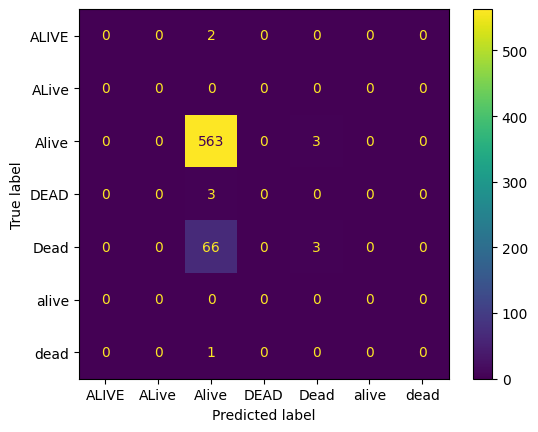

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay



cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)



disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)

disp.plot()

In [ ]:
# Convert to strings, strip spaces, and uppercase
y_train = y_train.astype(str).str.upper().str.strip()
y_test = y_test.astype(str).str.upper().str.strip()

# Check unique values
print(y_train.unique())
print(y_test.unique())


['1' '0']
['1' '0']


In [ ]:
print(logreg.classes_)


['ALIVE' 'ALive' 'Alive' 'DEAD' 'Dead' 'alive' 'dead']


In [ ]:
# Clean and standardize labels before training
y_train = y_train.astype(str).str.upper().str.strip()
y_test = y_test.astype(str).str.upper().str.strip()

# Verify cleaning worked
print(y_train.unique())
print(y_test.unique())


['1' '0']
['1' '0']


In [ ]:
print(logreg.classes_)


['ALIVE' 'ALive' 'Alive' 'DEAD' 'Dead' 'alive' 'dead']


In [ ]:
# Retrain the model with cleaned labels
logreg.fit(X_train, y_train)

# Check the classes again
print(logreg.classes_)


['0' '1']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      73.0
           1       0.00      0.00      0.00     568.0
       Alive       0.00      0.00      0.00       0.0
        Dead       0.00      0.00      0.00       0.0

    accuracy                           0.00     641.0
   macro avg       0.00      0.00      0.00     641.0
weighted avg       0.00      0.00      0.00     641.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

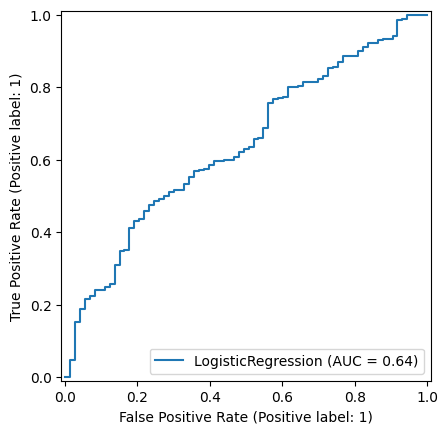

In [ ]:
from sklearn.metrics import RocCurveDisplay

logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.predict(X_test)

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# Create a KNN model
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}

# Use GridSearchCV with multi-class ROC AUC scoring
scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)

# Set up GridSearchCV
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring=scorer)

# Fit model to data
knn_gscv.fit(X, y)


In [81]:
# Assuming X_test and X_train were created with the same feature_cols_mortality
feature_cols_mortality = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage',
                          'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                          'Estrogen_Status', 'Progesterone_Status',
                          'Regional_Node_Examined', 'Reginol_Node_Positive']

# Ensure X_test has the same columns and order as the training data

# Reset X_test using the original data to ensure it includes all columns
X_test = data.loc[X_test.index, feature_cols_mortality]  # Filter by X_test indices

# If one-hot encoding was used in training, apply it to X_test:
X_test = pd.get_dummies(X_test, columns=['T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status'])

# Ensure the same columns exist in X_test as were used during training (use X instead of X_train, if X_train might have been modified in-place)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with default value 0
X_test = X_test[X.columns]  # Reorder columns to match X


# Now you can predict
y_pred = knn_gscv.predict(X_test)

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()